Import Libraries (mainly going to be using PyTorch)

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from PIL import Image
import random
import torch.nn.functional as F

Loading in MNIST Data from Pytorch's TorchVision Module

In [2]:
training_data = torchvision.datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()

)

test_data = torchvision.datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()

)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16136833.05it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 625791.40it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2704726.66it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10892240.58it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### Taking a look at our data...

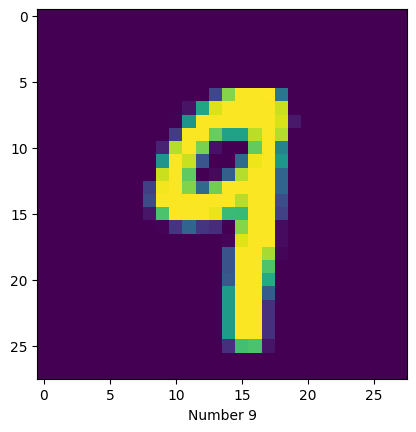

In [3]:
img_data, label = training_data[random.randint(0, len(training_data))]
plt.xlabel(f"Number {label}")
plt.imshow(img_data.permute(1, 2, 0))

Create training and testing dataloaders for model

In [4]:
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=4, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=True)

**Define Neural Network Layers and Outline**

In [6]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1)
    self.pool1 = nn.MaxPool2d(2, 2)

    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)
    self.pool2 = nn.MaxPool2d(2, 2)

    self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)

  def forward(self, x):
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))

    x = x.view(-1, 16 * 5 * 5)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x




In [7]:
net = ConvNet()
net

ConvNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Define hyperparameters (Loss, optimizer)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=net.parameters(), lr=0.001, momentum=0.9)

Begin training for a certain amount of **epochs**

In [11]:

def training(epochs=3):
  for i in range(epochs):
    running_loss = 0.0
    for j, data in enumerate(train_dataloader, 0):
      optimizer.zero_grad()

      inputs, labels = data

      outputs = net(inputs)

      loss = criterion(outputs, labels)

      loss.backward()
      optimizer.step()

      running_loss += loss.item()


      if (j % 3000 == 2999):
        print(f"Epoch: {i + 1} [{j}], Loss: {loss.item()}",)


training(5)



Epoch: 1 [2999], Loss: 0.0016633693594485521
Epoch: 1 [5999], Loss: 0.0058644721284508705
Epoch: 1 [8999], Loss: 0.006349812261760235
Epoch: 1 [11999], Loss: 0.0014466776046901941
Epoch: 1 [14999], Loss: 0.008947581984102726
Epoch: 2 [2999], Loss: 1.6940690279006958
Epoch: 2 [5999], Loss: 0.27801406383514404
Epoch: 2 [8999], Loss: 0.0017079703975468874
Epoch: 2 [11999], Loss: 0.0004992831381969154
Epoch: 2 [14999], Loss: 0.0027832016348838806
Epoch: 3 [2999], Loss: 0.0016296901740133762
Epoch: 3 [5999], Loss: 0.00035588466562330723
Epoch: 3 [8999], Loss: 0.9095280170440674
Epoch: 3 [11999], Loss: 0.0009050194057635963
Epoch: 3 [14999], Loss: 2.4497196136508137e-05
Epoch: 4 [2999], Loss: 0.0010828584199771285
Epoch: 4 [5999], Loss: 0.005356467794626951
Epoch: 4 [8999], Loss: 0.000228751843678765
Epoch: 4 [11999], Loss: 0.0025161956436932087
Epoch: 4 [14999], Loss: 5.653269909089431e-05
Epoch: 5 [2999], Loss: 0.09518894553184509
Epoch: 5 [5999], Loss: 0.32847103476524353
Epoch: 5 [8999],

Save Model to desired path of your choice

In [12]:
PATH = "/content/drive/MyDrive/Models/MNISTDigitCNN.pt"
torch.save(net.state_dict(), PATH)

Load Model for **Testing**

In [13]:
model = torch.load(PATH, weights_only=False)

In [14]:
sampleNet = ConvNet()

In [15]:
sampleNet.load_state_dict(model)

<All keys matched successfully>

**Define Testing function and check to see how your model performs!**

In [43]:
def test_model():
  img_data, label = training_data[random.randint(0, len(training_data))]
  plt.xlabel(f"Predicted Number: {label}")
  plt.title("Model Testing")
  plt.imshow(img_data.permute(1, 2, 0))

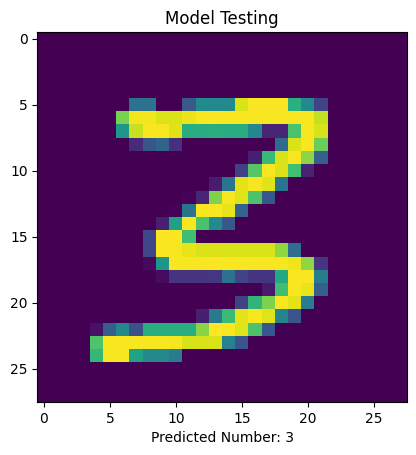

In [53]:
test_model()